# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

### Import necessary libraries

In [24]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import copy
import random
from collections import Counter
import shap
from copy import deepcopy
from torch.optim import lr_scheduler

# Exploratory Data Analysis
Let's look at given data

In [25]:
# load train data
with open('task_1_train_data.json') as file:
    data = json.load(file)

# load hidden data
with open('task_1_verify.json') as file:
    data_hidden = json.load(file)

# print the example of a record
print(data[0])

{'browser': 'Chrome', 'os': 'Debian', 'locale': 'ur-PK', 'user_id': 116, 'location': 'Russia/Moscow', 'sites': [{'site': 'bing.net', 'length': 52}, {'site': 'live.com', 'length': 52}, {'site': 'twitter.com', 'length': 89}, {'site': 'googleapis.com', 'length': 57}, {'site': 'ucr.edu', 'length': 259}, {'site': 'runnable.com', 'length': 42}, {'site': 'mobpartner.mobi', 'length': 40}, {'site': 'paris-soir.info', 'length': 94}, {'site': 'decideursenregion.fr', 'length': 51}, {'site': 'cdn-videodesk.com', 'length': 113}], 'time': '04:12:00', 'date': '2017-06-29'}


In [26]:
# converting to dataframe 
df = pd.DataFrame(data)
X_hidden = pd.DataFrame(data_hidden)

df.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23


Let's check general information about the dataset

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   browser   40000 non-null  object
 1   os        40000 non-null  object
 2   locale    40000 non-null  object
 3   user_id   40000 non-null  int64 
 4   location  40000 non-null  object
 5   sites     40000 non-null  object
 6   time      40000 non-null  object
 7   date      40000 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.4+ MB
None


Fortunately for us, this dataset does not contain any missing values.
Now we plot distribution of Waldo's records in the dataset

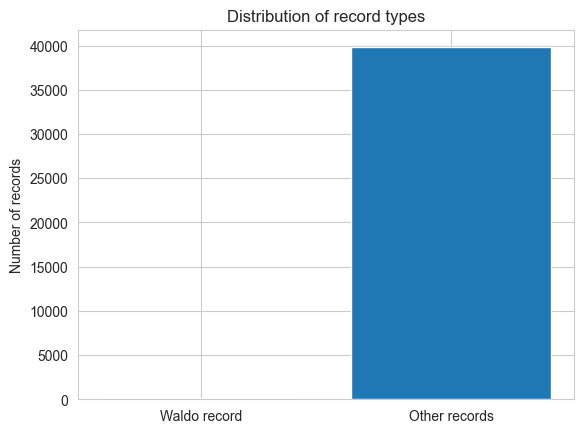

Waldo records are only 0.5% of all data


In [28]:
waldo_records = len(df[df['user_id'] == 0])
other_records = df.shape[0] - waldo_records

# show distribution of records
fig, ax = plt.subplots()
record_type = ['Waldo record', 'Other records']
counts = [waldo_records, other_records]

ax.bar(record_type, counts)

ax.set_ylabel('Number of records')
ax.set_title('Distribution of record types')

plt.show()

print(f"Waldo records are only {waldo_records / df.shape[0] * 100}% of all data")

We can notice that the dataset is **highly imbalanced**. This can be a big problem in thr ANN learning process.
Let's count number of unique ids:

In [29]:
unique_id_number = df['user_id'].unique().shape[0]
print(f"We have {unique_id_number} different user ids")

We have 200 different user ids


Since there are only 200 different users, it can be concluded that there is the same amount of information about each user - 0.5 %
Now let's compare distribution of **operating systems, browsers, locales,** and **locations** between all users and Waldo

### Opearing system Distribution

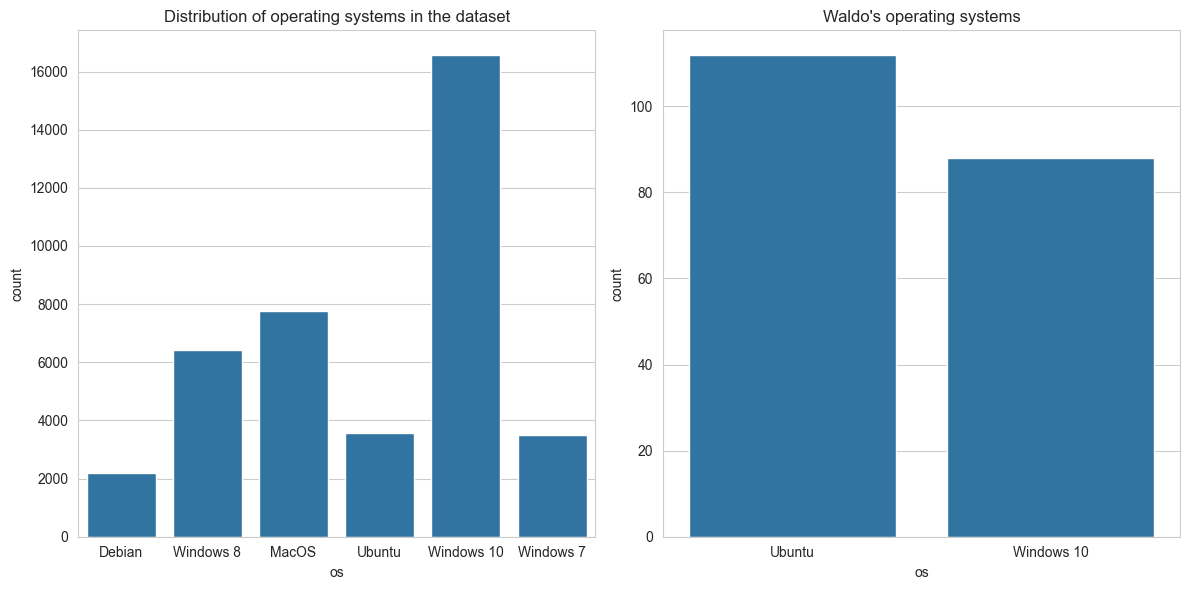

Waldo used only this operating systems: ['Ubuntu' 'Windows 10']
Therefore Waldo didn't use ['Windows 7', 'Debian', 'Windows 8', 'MacOS']


In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='os', data=df)
plt.title('Distribution of operating systems in the dataset')
plt.subplot(1, 2, 2)
sns.countplot(x='os', data=df[df['user_id'] == 0])
plt.title("Waldo's operating systems")
plt.tight_layout()
plt.show()

print(f"Waldo used only this operating systems: {df[df['user_id'] == 0]['os'].unique()}")
print(
    f"Therefore Waldo didn't use {list(set(df[df['user_id'] != 0]['os'].unique()) - set(df[df['user_id'] == 0]['os'].unique()))}")

### Browsers Distribution

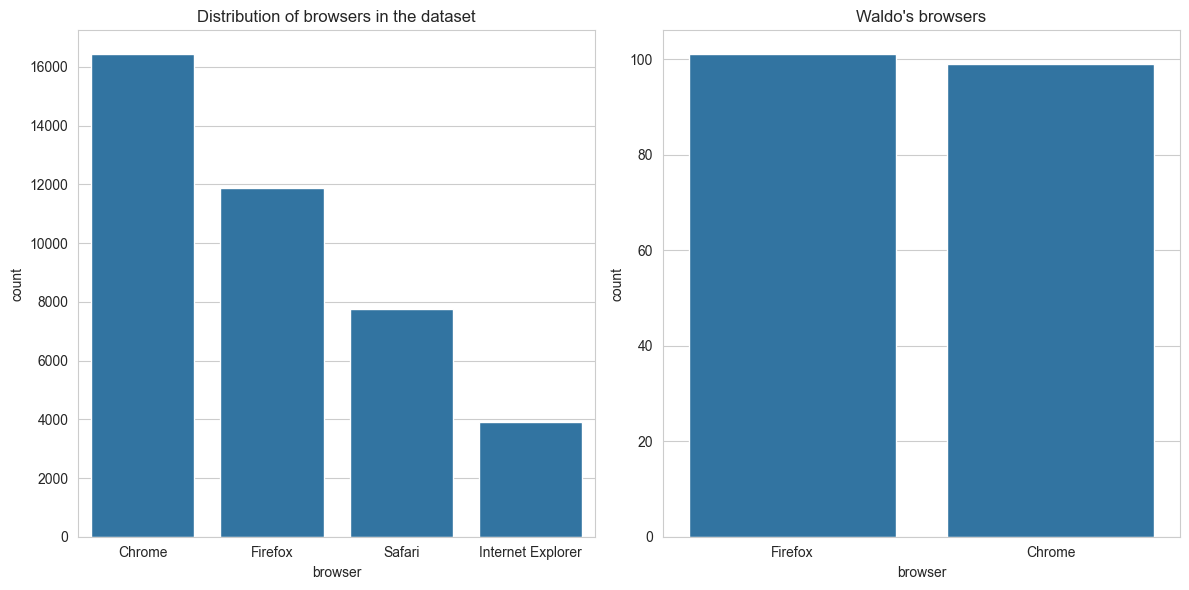

Waldo used only: ['Firefox' 'Chrome'] browsers
Therefore Waldo didn't use ['Safari', 'Internet Explorer'] browsers


In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='browser', data=df)
plt.title('Distribution of browsers in the dataset')
plt.subplot(1, 2, 2)
sns.countplot(x='browser', data=df[df['user_id'] == 0])
plt.title("Waldo's browsers")
plt.tight_layout()
plt.show()

print(f"Waldo used only: {df[df['user_id'] == 0]['browser'].unique()} browsers")
print(
    f"Therefore Waldo didn't use {list(set(df[df['user_id'] != 0]['browser'].unique()) - set(df[df['user_id'] == 0]['browser'].unique()))} browsers")

### Locales Distribution

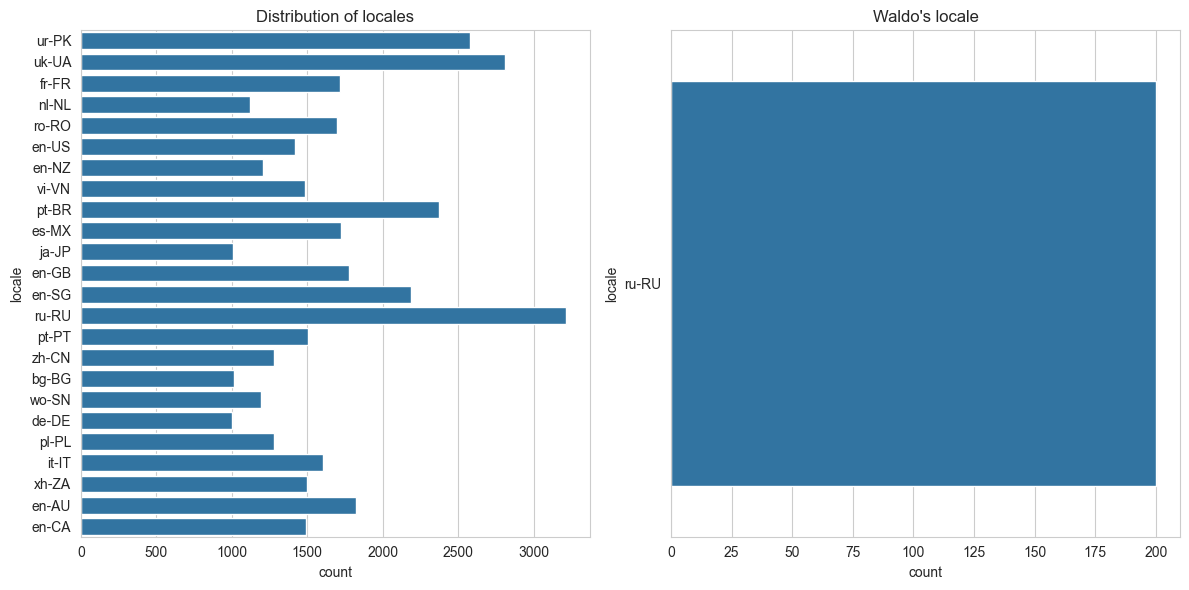

Waldo used only: ['ru-RU'] locale


In [32]:
# fix incorrect locale
df['locale'] = df['locale'].replace('ru_RU', 'ru-RU')
X_hidden['locale'] = X_hidden['locale'].replace('ru_RU', 'ru-RU')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='locale', data=df)
plt.title('Distribution of locales')
plt.subplot(1, 2, 2)
sns.countplot(y='locale', data=df[df['user_id'] == 0])
plt.title("Waldo's locale")
plt.tight_layout()
plt.show()

print(f"Waldo used only: {df[df['user_id'] == 0]['locale'].unique()} locale")

### Locations Distribution

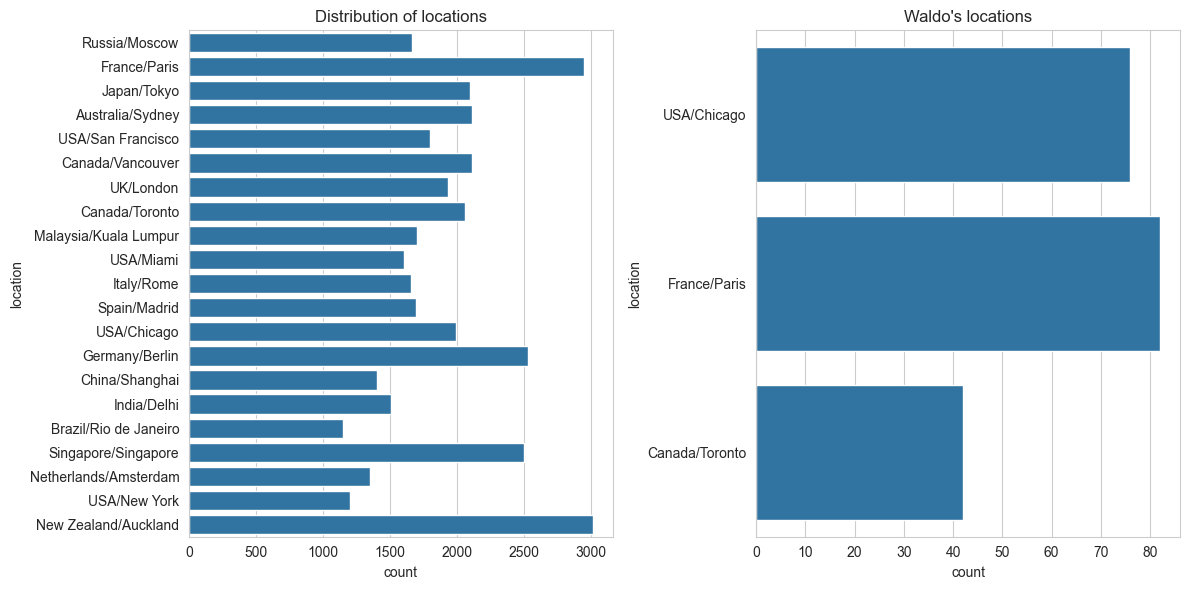

Waldo used only: ['USA/Chicago' 'France/Paris' 'Canada/Toronto'] location


In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='location', data=df)
plt.title('Distribution of locations')
plt.subplot(1, 2, 2)
sns.countplot(y='location', data=df[df['user_id'] == 0])
plt.title("Waldo's locations")
plt.tight_layout()
plt.show()

print(f"Waldo used only: {df[df['user_id'] == 0]['location'].unique()} location")

Make columns *time* and *date* and polot their distribution

In [34]:
def create_month_hour_features(df):
    df['time'] = df['time'].apply(lambda x: datetime.strptime(x, "%H:%M:%S").time())
    df['date'] = df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())
    df['datetime'] = df.apply(lambda row: datetime.combine(row['date'], row['time']), axis=1)
    df = df.drop(columns=['date', 'time'])
    df['hour'] = df['datetime'].dt.hour
    df['month'] = df['datetime'].dt.month
    df = df.drop('datetime', axis=1)
    return df


df = create_month_hour_features(df)
X_hidden = create_month_hour_features(X_hidden)
df.head()

,browser,os,locale,user_id,location,sites,hour,month
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",4,6
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",3,3
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",5,11
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",0,8
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22,7


### Time Distribution by hour

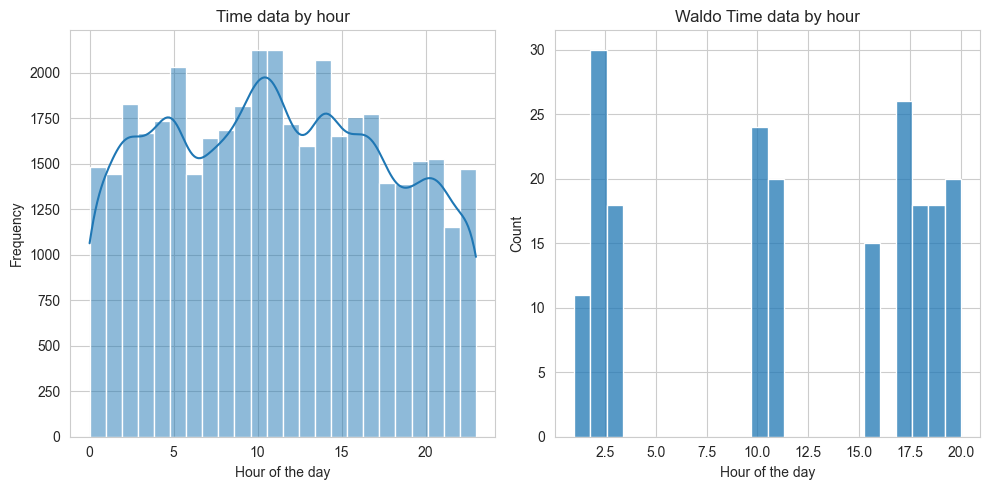

In [35]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['hour'], bins=24, kde=True)
plt.title('Time data by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['user_id'] == 0]['hour'], bins=24)
plt.title('Waldo Time data by hour')
plt.xlabel('Hour of the day')

plt.tight_layout()
plt.show()

### Time distribution by month

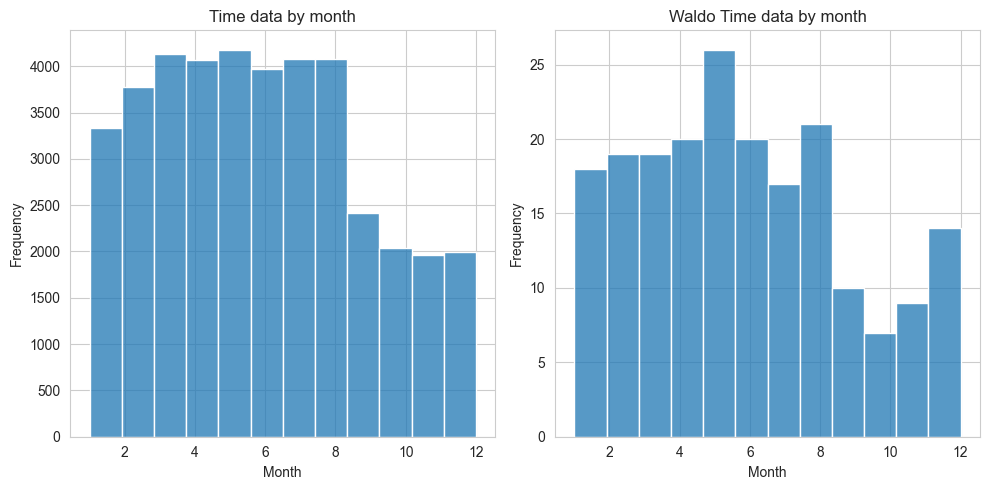

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['month'], bins=12)
plt.title('Time data by month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['user_id'] == 0]['month'], bins=12)
plt.title('Waldo Time data by month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Sites information
Obtain information about the number of different sites in the dataset

In [37]:
# Extract 'site' information from each row and flatten into a list
sites_list = [entry['site'] for sublist in df['sites'] for entry in sublist]
# Count the number of unique sites
num_unique_sites = len(set(sites_list))
print("Number of different sites:", num_unique_sites)

Number of different sites: 11129


Print histograms of top 7 bisited sites by Waldo

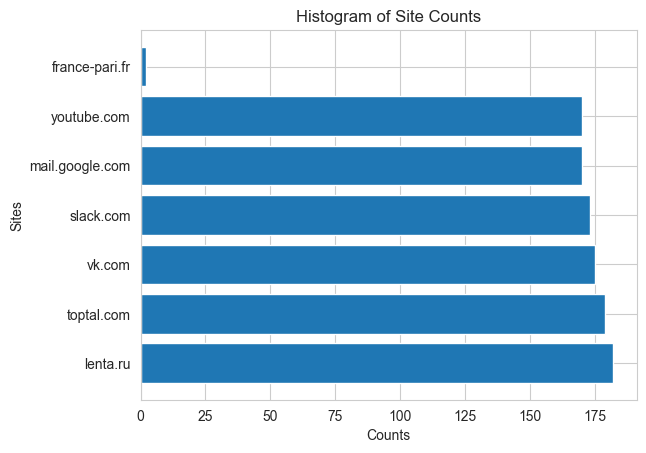

In [38]:
sites = [entry['site'] for sublist in df[df['user_id'] == 0]['sites'] for entry in sublist]
sites_count = Counter(sites)

top_sites_count = sites_count.most_common(7)
sites = [site[0] for site in top_sites_count]
counts = [site[1] for site in top_sites_count]

# Plotting the histograms
plt.barh(sites, counts)
plt.xlabel('Counts')
plt.ylabel('Sites')
plt.title('Histogram of Site Counts')
plt.show()

### The number of mentions of each site for each user
Let's plot the graph and see how many different sites have each user visited, depending on the number of visits

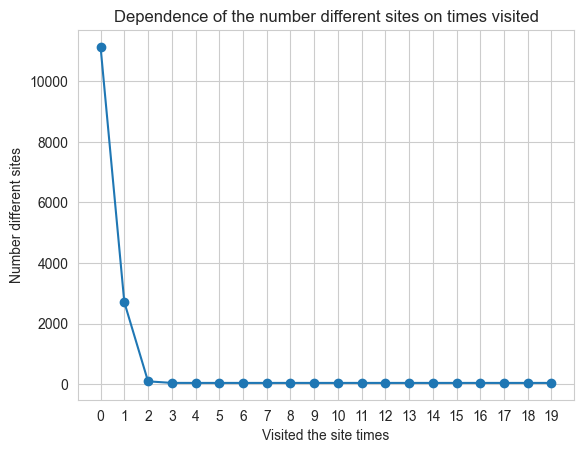

Number of different sites for threshold = 2: 93.0


In [39]:
sites_number = np.zeros(20)

# iterate through number of visits from 0 to 19
for min_visits_number in range(20):
    # list of sites
    all_sites = []
    # iterate through all users
    for i in range(unique_id_number):
        # get list of all sites visited by the user
        sites = [entry['site'] for sublist in df[df['user_id'] == i]['sites'] for entry in sublist]
        sites_count = Counter(sites)
        sites_count = sorted(sites_count.items(), key=lambda x: x[1], reverse=True)
        # leave sites which  the user visited more the 'min_visits_number' times
        for item in sites_count:
            if item[1] > min_visits_number:
                all_sites.append(item[0])
    sites_number[min_visits_number] = len(list(set(all_sites)))

plt.plot(range(20), sites_number, marker='o')
plt.xlabel('Visited the site times')
plt.ylabel('Number different sites')
plt.title('Dependence of the number different sites on times visited')
plt.grid(True)
plt.xticks(range(20))
plt.show()

print(f'Number of different sites for threshold = 2: {sites_number[2]}')

From the graph we can see that the number of different sites drastically drops at the beginning. 
**Therefore, users visited most of the sites only 1-2 times.**

## Conclusions from data exploration:
- Waldo's locale feature *ru-Ru* may play a significant role in determining Waldo
- Most of the sites have been visited only 1 or 2 times, therefore it makes no sense to save them
- Waldo used only 2 browsers and 2 operating systems, so these parameters may play a role in Waldo's detection
- During the day Waldo visited the sites from about 10 to 11 and from 17 to 3
- Waldo has 5 favourite sites (the number of visits to these sites is much higher than the rest)

# Data preprocessing and Feature Engineering

Split data on features and labels

In [40]:
X = df.drop('user_id', axis=1)
y = df['user_id']
y = [1 if us_id != 0 else 0 for us_id in y]
# change 0 to 1 and vice verse
y = [1 - x for x in y]

Split data on train and test keeping distribution of Waldo's records 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=17)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32000 entries, 24780 to 11236
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   browser   32000 non-null  object
 1   os        32000 non-null  object
 2   locale    32000 non-null  object
 3   location  32000 non-null  object
 4   sites     32000 non-null  object
 5   hour      32000 non-null  int32 
 6   month     32000 non-null  int32 
dtypes: int32(2), object(5)
memory usage: 1.7+ MB


Split location column on *country* and *city* column

In [43]:
def create_country_city_columns(df):
    df[['country', 'city']] = df['location'].str.split('/', expand=True)
    df = df.drop('location', axis=1)
    return df

X_train = create_country_city_columns(X_train)
X_test = create_country_city_columns(X_test)
X_hidden = create_country_city_columns(X_hidden)

# Encoding categorically
determine and encode categorical features using *OneHotEncoder*

In [44]:
def encode_categorically(data, feature):
    """
    This function encodes a categorical feature in dataset using OneHotEncoder
    :param data: given data
    :param feature: categorical feature
    :return: data with encoded feature
    """

    # Define OneHotEncoder instance
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    # encoding feature
    one_hot_array = data[[feature]]

    feature_df = pd.DataFrame(one_hot_encoder.fit_transform(one_hot_array),
                              columns=one_hot_encoder.get_feature_names_out([feature]))

    # concat encoded data with given dataframe
    data = pd.concat([data.reset_index(drop=True), feature_df], axis=1)

    # drop redundant feature
    data = data.drop(feature, axis=1)
    return data

# features to encode
one_hot_encoder_features = ['browser', 'os', 'country', 'city', 'hour', 'month', 'locale']

for feature in one_hot_encoder_features:
    X_train = encode_categorically(X_train, feature)
    X_test = encode_categorically(X_test, feature)
    X_hidden = encode_categorically(X_hidden, feature)

X_train.head()

,sites,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,...,locale_pt-BR,locale_pt-PT,locale_ro-RO,locale_ru-RU,locale_uk-UA,locale_ur-PK,locale_vi-VN,locale_wo-SN,locale_xh-ZA,locale_zh-CN
0,"[{'site': 'baidu.com', 'length': 457}, {'site'...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[{'site': 'vk.com', 'length': 81}, {'site': 'm...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[{'site': 'mail.google.com', 'length': 129}, {...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[{'site': 'toptal.com', 'length': 82}, {'site'...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[{'site': 'youtube.com', 'length': 93}, {'site...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dealing with sites
Let's save only sites, which was visited more than 2 times by some person

In [45]:
# set threshold
visits_threshold = 2
# list containing all sites which were visited more than threshold times
all_sites = []
for i in range(unique_id_number):
    # get all sites of a given user
    sites = [entry['site'] for sublist in df[df['user_id'] == i]['sites'] for entry in sublist]
    sites_count = Counter(sites)
    sites_count = sorted(sites_count.items(), key=lambda x: x[1], reverse=True)
    # get only suitable sites
    for item in sites_count:
        if item[1] > visits_threshold:
            all_sites.append(item[0])

# list with all the sites
all_sites = list(set(all_sites))

Adding columns with names of all these sites, information in this column will contain the number of times user visited this site and column *length_<site_name>* will contain the mean length of these visits

In [46]:
def add_sites_and_length(X, sites_list):
    # Initialize new columns with zeros
    for site in sites_list:
        X[site] = 0
        X[f'length_{site}'] = 0
        X['sites_number'] = 0

    for i in tqdm(range(X.shape[0]), desc='Processing rows', unit=' row'):
        site_lengths = {}
        sites_number = 0
        for item in X.loc[i, 'sites']:
            sites_number += 1
            site = item['site']
            if site in sites_list:
                # Increment site count
                X.at[i, site] += 1
                # Add length to site_lengths dictionary
                site_lengths.setdefault(site, []).append(item['length'])

        X.at[i, 'sites_number'] = sites_number
        # Calculate mean length for each site and update DataFrame
        for site, lengths in site_lengths.items():
            X.at[i, site] = len(lengths)  # Set site count
            if lengths:
                mean_length = sum(lengths) / len(lengths)
                X.at[i, f'length_{site}'] = int(mean_length)

    # do not nees 'sites' column anymore
    X = X.drop(columns=['sites'])
    return X


X_train = add_sites_and_length(X_train, all_sites)
X_test = add_sites_and_length(X_test, all_sites)
X_hidden = add_sites_and_length(X_hidden, all_sites)

X_train.head()

C:\Users\roman\AppData\Local\Temp\ipykernel_13552\214513794.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[site] = 0
C:\Users\roman\AppData\Local\Temp\ipykernel_13552\214513794.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'length_{site}'] = 0
C:\Users\roman\AppData\Local\Temp\ipykernel_13552\214513794.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,dblp.org,length_dblp.org,plusbellelavie.fr,length_plusbellelavie.fr,zabbix.com,length_zabbix.com,googlevideo.com,length_googlevideo.com,twitter.com,length_twitter.com
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Feature Scaling
Using *MinMaxScaler* to scale all numerical features

In [47]:
def feature_scaling(df, feature):
    scaler = MinMaxScaler()
    df[feature] = scaler.fit_transform(df[[feature]])
    return df

# features to scale
features_to_scale = ['sites_number'] + all_sites
for st in all_sites:
    features_to_scale.append(f'length_{st}')

for feature in features_to_scale:
    X_train = feature_scaling(X_train, feature)
    X_test = feature_scaling(X_test, feature)
    X_hidden = feature_scaling(X_hidden, feature)

In [48]:
# check what we got
X_train.head()

,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,dblp.org,length_dblp.org,plusbellelavie.fr,length_plusbellelavie.fr,zabbix.com,length_zabbix.com,googlevideo.com,length_googlevideo.com,twitter.com,length_twitter.com
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Oversampler
Since we have higly imbalanced dataset, we will use [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) - Synthetic Minority Over-sampling Technique

In [49]:
# define oversampler
oversampler = SMOTE()
X_train, y_train = oversampler.fit_resample(X_train, y_train)

# Model Design and Training

Set up seed

In [50]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [51]:
# set up device
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f'You are using {device} device')

You are using cuda device


### Model Designing
I decided to create ANN model using 4 Linear layers and added batch normalization and dropout for regularization. Since this is binary classification problem, I will use sigmoid function.

In [52]:
class Waldo(nn.Module):
    def __init__(self, input_size):
        super(Waldo, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.sigmoid(self.fc4(x))
        return x



Converting data to dataloaders

In [53]:
def convert_to_dataloader(X, y, batch_size):
    X_tensor = torch.tensor(X.values.astype(np.float32))
    y = np.array(y)
    y = y.reshape(-1, 1)
    y_tensor = torch.tensor(y.astype(np.float32))
    dataset = TensorDataset(X_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

input_size = X_train.shape[1]
batch_size = 100

train_loader = convert_to_dataloader(X_train, y_train, batch_size)
test_loader = convert_to_dataloader(X_test, y_test, batch_size)

### Train and test functions

In [54]:
def train(model, device, train_loader, optimizer, criterion, threshold=0.94, enable_output=True):
    # set model to train mode
    model.train()
    # collect predictions and targets values
    predictions = []
    targets = []
    # overall train loss
    train_loss = 0
    if enable_output:
        bar = tqdm(train_loader)
    else:
        bar = train_loader
    iteration = 0
    overall_loss = 0
    for data, target in bar:
        # load to device
        data, target = data.to(device), target.to(device)
        # Avoiding an accumulation of gradients
        optimizer.zero_grad()
        # Prediction 
        output = model(data)
        pred = (output >= threshold).float()
        predictions.extend(pred.cpu().numpy())
        targets.extend(target.cpu().numpy())
        # Error between prediction and ground truth
        loss = criterion(output, target)
        train_loss += loss.item()
        # Compute gradient
        loss.backward()
        # Update params of model
        optimizer.step()

        iteration += 1
        overall_loss += loss.item()
        if enable_output:
            bar.set_postfix({"Loss": format(overall_loss / iteration, '.6f')})
            
    # calculate different metrics
    train_loss /= len(test_loader.dataset)
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    f1 = f1_score(targets, predictions)
    auc = roc_auc_score(targets, predictions)
    if enable_output:
        print(
            f"Train set: Average loss: {train_loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 score: {f1}, AUC: {auc}")
    return train_loss, accuracy

In [55]:
def test(model, device, test_loader, threshold=0.94, enable_output=True):
    # Set the model to evaluation mode
    model.eval()
    # overall test loss
    test_loss = 0
    # collect predictions and targets values
    predictions = []
    targets = []
    with torch.no_grad():
        for data, target in test_loader:
            # load to device
            data, target = data.to(device), target.to(device)
            # get output
            output = model(data)

            # Compute the loss
            test_loss += F.binary_cross_entropy(output, target.float(), reduction='sum').item()

            # Convert output to binary predictions (0 or 1)
            pred = (output >= threshold).float()

            predictions.extend(pred.cpu().numpy())
            targets.extend(target.cpu().numpy())

    # calculate different metrics
    test_loss /= len(test_loader.dataset)
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    f1 = f1_score(targets, predictions)
    auc = roc_auc_score(targets, predictions)

    if enable_output:
        print(
            f"Test set: Average loss: {test_loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 score: {f1}, AUC: {auc}")

    return test_loss, accuracy, f1

### Model initialization

In [56]:
# define models
model = Waldo(input_size).to(device)
# save best weights of the model
best_model_wts = deepcopy(model.state_dict())
print(model)
# defining hyperparameters
lr = 0.001
momentum = 0.5
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.3,
                                           patience=3, min_lr=0.000000001)

Waldo(
  (fc1): Linear(in_features=295, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### Model training

Epoch # 1/30


100%|██████████| 637/637 [00:04<00:00, 144.64it/s, Loss=0.040747]


Train set: Average loss: 0.003244462808070239, Accuracy: 0.9287217336683417, Precision: 0.9951753908658904, Recall: 0.8616206030150754, F1 score: 0.9235948625582844, AUC: 0.9287217336683418
Test set: Average loss: 0.029695971557637677, Accuracy: 0.994125, Precision: 0.4492753623188406, Recall: 0.775, F1 score: 0.5688073394495413, AUC: 0.8851130653266333
Epoch # 2/30


100%|██████████| 637/637 [00:05<00:00, 125.17it/s, Loss=0.014141]


Train set: Average loss: 0.0011259377181413583, Accuracy: 0.9921796482412061, Precision: 0.996703645007924, Recall: 0.9876256281407035, F1 score: 0.9921438712730715, AUC: 0.992179648241206
Test set: Average loss: 0.02765555145672988, Accuracy: 0.9945, Precision: 0.46875, Recall: 0.75, F1 score: 0.5769230769230769, AUC: 0.8728643216080403
Epoch # 3/30


100%|██████████| 637/637 [00:05<00:00, 121.43it/s, Loss=0.012674]


Train set: Average loss: 0.0010091496345339692, Accuracy: 0.9929962311557788, Precision: 0.9968348420586187, Recall: 0.9891331658291457, F1 score: 0.9929690702147114, AUC: 0.9929962311557788
Test set: Average loss: 0.024482196935452522, Accuracy: 0.99575, Precision: 0.5576923076923077, Recall: 0.725, F1 score: 0.6304347826086957, AUC: 0.8610552763819096
Epoch # 4/30


100%|██████████| 637/637 [00:05<00:00, 120.76it/s, Loss=0.010281]


Train set: Average loss: 0.0008185854910661874, Accuracy: 0.9940640703517588, Precision: 0.9973757430125205, Recall: 0.9907349246231156, F1 score: 0.9940442427680091, AUC: 0.9940640703517588
Test set: Average loss: 0.025730068123462842, Accuracy: 0.995, Precision: 0.5, Recall: 0.675, F1 score: 0.574468085106383, AUC: 0.8358040201005025
Epoch # 5/30


100%|██████████| 637/637 [00:05<00:00, 121.67it/s, Loss=0.010100]


Train set: Average loss: 0.0008041985354993813, Accuracy: 0.9947393216080402, Precision: 0.9976621489274319, Recall: 0.9918027638190955, F1 score: 0.9947238278235396, AUC: 0.9947393216080401
Test set: Average loss: 0.024956902246151002, Accuracy: 0.9955, Precision: 0.54, Recall: 0.675, F1 score: 0.6, AUC: 0.8360552763819096
Epoch # 6/30


100%|██████████| 637/637 [00:05<00:00, 122.17it/s, Loss=0.008660]


Train set: Average loss: 0.0006895844126811425, Accuracy: 0.994770728643216, Precision: 0.9980713901798982, Recall: 0.9914572864321608, F1 score: 0.9947533441522634, AUC: 0.994770728643216
Test set: Average loss: 0.02845773913100129, Accuracy: 0.99525, Precision: 0.5185185185185185, Recall: 0.7, F1 score: 0.5957446808510638, AUC: 0.8483668341708542
Epoch # 7/30


100%|██████████| 637/637 [00:05<00:00, 121.86it/s, Loss=0.008437]


Train set: Average loss: 0.0006718172531418532, Accuracy: 0.9951633165829146, Precision: 0.9979156139464376, Recall: 0.9923994974874372, F1 score: 0.9951499118165785, AUC: 0.9951633165829147
Test set: Average loss: 0.022531717260921142, Accuracy: 0.996, Precision: 0.5833333333333334, Recall: 0.7, F1 score: 0.6363636363636364, AUC: 0.8487437185929649
Epoch # 8/30


100%|██████████| 637/637 [00:05<00:00, 116.13it/s, Loss=0.007130]


Train set: Average loss: 0.0005677112931862211, Accuracy: 0.9961683417085427, Precision: 0.9983596214511041, Recall: 0.9939698492462311, F1 score: 0.9961598992760465, AUC: 0.9961683417085426
Test set: Average loss: 0.02775826608054922, Accuracy: 0.995125, Precision: 0.5094339622641509, Recall: 0.675, F1 score: 0.5806451612903226, AUC: 0.8358668341708543
Epoch # 9/30


100%|██████████| 637/637 [00:05<00:00, 118.48it/s, Loss=0.007429]


Train set: Average loss: 0.0005914979090030101, Accuracy: 0.9956815326633166, Precision: 0.9982321558228368, Recall: 0.9931218592964824, F1 score: 0.9956704504305934, AUC: 0.9956815326633166
Test set: Average loss: 0.022585962850103898, Accuracy: 0.99675, Precision: 0.675, Recall: 0.675, F1 score: 0.675, AUC: 0.8366834170854272
Epoch # 10/30


100%|██████████| 637/637 [00:05<00:00, 118.20it/s, Loss=0.006773]


Train set: Average loss: 0.0005392926165723111, Accuracy: 0.9961840452261307, Precision: 0.9984540148288373, Recall: 0.9939070351758794, F1 score: 0.99617533642874, AUC: 0.9961840452261308
Test set: Average loss: 0.022150041711363883, Accuracy: 0.9965, Precision: 0.65, Recall: 0.65, F1 score: 0.65, AUC: 0.8241206030150753
Epoch # 11/30


100%|██████████| 637/637 [00:05<00:00, 114.46it/s, Loss=0.005960]


Train set: Average loss: 0.0004745452279234996, Accuracy: 0.9965609296482412, Precision: 0.9986752878094938, Recall: 0.9944409547738694, F1 score: 0.9965536234164765, AUC: 0.9965609296482412
Test set: Average loss: 0.023101911722529622, Accuracy: 0.996375, Precision: 0.6341463414634146, Recall: 0.65, F1 score: 0.6419753086419753, AUC: 0.8240577889447236
Epoch # 12/30


100%|██████████| 637/637 [00:05<00:00, 116.10it/s, Loss=0.005574]


Train set: Average loss: 0.0004437938813371147, Accuracy: 0.9967336683417085, Precision: 0.9988015642740002, Recall: 0.9946608040201005, F1 score: 0.9967268836155347, AUC: 0.9967336683417084
Test set: Average loss: 0.026020898185636725, Accuracy: 0.995625, Precision: 0.5510204081632653, Recall: 0.675, F1 score: 0.6067415730337079, AUC: 0.8361180904522613
Epoch # 13/30


100%|██████████| 637/637 [00:05<00:00, 119.79it/s, Loss=0.005052]


Train set: Average loss: 0.00040229103133060563, Accuracy: 0.9970948492462312, Precision: 0.9989282224253696, Recall: 0.9952575376884422, F1 score: 0.9970895017541651, AUC: 0.9970948492462312
Test set: Average loss: 0.02507770437660065, Accuracy: 0.99625, Precision: 0.6136363636363636, Recall: 0.675, F1 score: 0.6428571428571429, AUC: 0.83643216080402
Epoch # 14/30


100%|██████████| 637/637 [00:05<00:00, 106.28it/s, Loss=0.004716]


Train set: Average loss: 0.0003755130654299137, Accuracy: 0.9969692211055277, Precision: 0.9990223595824529, Recall: 0.9949120603015076, F1 score: 0.9969629734535556, AUC: 0.9969692211055277
Test set: Average loss: 0.02449377705396819, Accuracy: 0.99625, Precision: 0.6136363636363636, Recall: 0.675, F1 score: 0.6428571428571429, AUC: 0.83643216080402
Epoch # 15/30


100%|██████████| 637/637 [00:05<00:00, 117.41it/s, Loss=0.004805]


Train set: Average loss: 0.0003825856690614273, Accuracy: 0.9965923366834171, Precision: 0.9988641741599621, Recall: 0.9943153266331658, F1 score: 0.9965845596915086, AUC: 0.996592336683417
Test set: Average loss: 0.02791119385480124, Accuracy: 0.99625, Precision: 0.6136363636363636, Recall: 0.675, F1 score: 0.6428571428571429, AUC: 0.83643216080402
Epoch # 16/30


100%|██████████| 637/637 [00:05<00:00, 123.12it/s, Loss=0.005332]


Train set: Average loss: 0.0004245619923349295, Accuracy: 0.9969378140703518, Precision: 0.9989278844637846, Recall: 0.9949434673366834, F1 score: 0.99693169480591, AUC: 0.9969378140703518
Test set: Average loss: 0.021428229187009037, Accuracy: 0.996875, Precision: 0.7419354838709677, Recall: 0.575, F1 score: 0.647887323943662, AUC: 0.7869974874371859
Epoch # 17/30


100%|██████████| 637/637 [00:05<00:00, 111.61it/s, Loss=0.004816]


Train set: Average loss: 0.0003834626980176381, Accuracy: 0.997141959798995, Precision: 0.9989283237723003, Recall: 0.9953517587939699, F1 score: 0.9971368341566246, AUC: 0.997141959798995
Test set: Average loss: 0.020059346837865633, Accuracy: 0.996625, Precision: 0.6585365853658537, Recall: 0.675, F1 score: 0.6666666666666666, AUC: 0.8366206030150753
Epoch # 18/30


100%|██████████| 637/637 [00:05<00:00, 116.60it/s, Loss=0.004342]


Train set: Average loss: 0.00034571674342032566, Accuracy: 0.9973304020100503, Precision: 0.9990545225338796, Recall: 0.9956030150753769, F1 score: 0.9973257826018562, AUC: 0.9973304020100503
Test set: Average loss: 0.021668127703164373, Accuracy: 0.99675, Precision: 0.6842105263157895, Recall: 0.65, F1 score: 0.6666666666666666, AUC: 0.8242462311557788
Epoch # 19/30


100%|██████████| 637/637 [00:05<00:00, 117.30it/s, Loss=0.003251]


Train set: Average loss: 0.0002588446233971808, Accuracy: 0.9978172110552764, Precision: 0.9994643138490625, Recall: 0.9961683417085427, F1 score: 0.9978136059771923, AUC: 0.9978172110552763
Test set: Average loss: 0.025342601794328855, Accuracy: 0.99675, Precision: 0.675, Recall: 0.675, F1 score: 0.675, AUC: 0.8366834170854272
Epoch # 20/30


100%|██████████| 637/637 [00:05<00:00, 116.79it/s, Loss=0.004080]


Train set: Average loss: 0.0003248696594728244, Accuracy: 0.9974089195979899, Precision: 0.9991490434618172, Recall: 0.9956658291457287, F1 score: 0.9974043952240872, AUC: 0.99740891959799
Test set: Average loss: 0.02122302707560948, Accuracy: 0.99725, Precision: 0.75, Recall: 0.675, F1 score: 0.7105263157894737, AUC: 0.8369346733668341
Epoch # 21/30


100%|██████████| 637/637 [00:05<00:00, 115.37it/s, Loss=0.003358]


Train set: Average loss: 0.00026737457823423937, Accuracy: 0.9981312814070352, Precision: 0.9992445465705562, Recall: 0.9970163316582915, F1 score: 0.9981291955540883, AUC: 0.9981312814070352
Test set: Average loss: 0.02594916176425795, Accuracy: 0.997, Precision: 0.7105263157894737, Recall: 0.675, F1 score: 0.6923076923076923, AUC: 0.8368090452261308
Epoch # 22/30


100%|██████████| 637/637 [00:05<00:00, 118.49it/s, Loss=0.003406]


Train set: Average loss: 0.0002711695458826853, Accuracy: 0.9980841708542714, Precision: 0.9992759098350333, Recall: 0.9968907035175879, F1 score: 0.998081881642664, AUC: 0.9980841708542713
Test set: Average loss: 0.021409896135814052, Accuracy: 0.9975, Precision: 0.8333333333333334, Recall: 0.625, F1 score: 0.7142857142857143, AUC: 0.8121859296482412
Epoch # 23/30


100%|██████████| 637/637 [00:05<00:00, 118.25it/s, Loss=0.003538]


Train set: Average loss: 0.00028170020719426247, Accuracy: 0.9980998743718593, Precision: 0.9993388117502597, Recall: 0.996859296482412, F1 score: 0.9980975141900285, AUC: 0.9980998743718593
Test set: Average loss: 0.02196650620131652, Accuracy: 0.997625, Precision: 0.8181818181818182, Recall: 0.675, F1 score: 0.7397260273972602, AUC: 0.8371231155778894
Epoch # 24/30


100%|██████████| 637/637 [00:05<00:00, 114.24it/s, Loss=0.002051]


Train set: Average loss: 0.00016332029337991116, Accuracy: 0.9989321608040201, Precision: 0.9995597484276729, Recall: 0.9983040201005026, F1 score: 0.998931489629164, AUC: 0.9989321608040201
Test set: Average loss: 0.02348069847130728, Accuracy: 0.99725, Precision: 0.75, Recall: 0.675, F1 score: 0.7105263157894737, AUC: 0.8369346733668341
Epoch # 25/30


100%|██████████| 637/637 [00:05<00:00, 124.70it/s, Loss=0.001768]


Train set: Average loss: 0.00014078782800697808, Accuracy: 0.9989478643216081, Precision: 0.9996540336530901, Recall: 0.9982412060301508, F1 score: 0.9989471202954349, AUC: 0.9989478643216081
Test set: Average loss: 0.02480038972755423, Accuracy: 0.996875, Precision: 0.6923076923076923, Recall: 0.675, F1 score: 0.6835443037974683, AUC: 0.836746231155779
Epoch # 26/30


100%|██████████| 637/637 [00:05<00:00, 112.29it/s, Loss=0.001444]


Train set: Average loss: 0.00011494746157393365, Accuracy: 0.9990106783919598, Precision: 0.9997169366252555, Recall: 0.9983040201005026, F1 score: 0.9990099787852597, AUC: 0.9990106783919599
Test set: Average loss: 0.02486817347713185, Accuracy: 0.997375, Precision: 0.7714285714285715, Recall: 0.675, F1 score: 0.72, AUC: 0.8369974874371859
Epoch # 27/30


100%|██████████| 637/637 [00:05<00:00, 113.91it/s, Loss=0.001234]


Train set: Average loss: 9.82197207910076e-05, Accuracy: 0.9991991206030151, Precision: 0.9997484672221348, Recall: 0.9986494974874371, F1 score: 0.9991986801791185, AUC: 0.9991991206030152
Test set: Average loss: 0.025600142195182342, Accuracy: 0.997125, Precision: 0.7428571428571429, Recall: 0.65, F1 score: 0.6933333333333334, AUC: 0.8244346733668342
Epoch # 28/30


100%|██████████| 637/637 [00:05<00:00, 120.34it/s, Loss=0.000918]


Train set: Average loss: 7.307454743457242e-05, Accuracy: 0.9992933417085427, Precision: 0.9998742257019778, Recall: 0.998712311557789, F1 score: 0.9992929308800653, AUC: 0.9992933417085428
Test set: Average loss: 0.027084294771907266, Accuracy: 0.997125, Precision: 0.7428571428571429, Recall: 0.65, F1 score: 0.6933333333333334, AUC: 0.8244346733668342
Epoch # 29/30


100%|██████████| 637/637 [00:05<00:00, 115.13it/s, Loss=0.001353]


Train set: Average loss: 0.00010775734131851778, Accuracy: 0.999230527638191, Precision: 0.9997484830383249, Recall: 0.998712311557789, F1 score: 0.9992301286784923, AUC: 0.999230527638191
Test set: Average loss: 0.026638646323967393, Accuracy: 0.99725, Precision: 0.7647058823529411, Recall: 0.65, F1 score: 0.7027027027027027, AUC: 0.8244974874371859
Epoch # 30/30


100%|██████████| 637/637 [00:05<00:00, 118.83it/s, Loss=0.001055]


Train set: Average loss: 8.400452421517457e-05, Accuracy: 0.9994189698492463, Precision: 0.9998114097123998, Recall: 0.9990263819095477, F1 score: 0.9994187416542298, AUC: 0.9994189698492463
Test set: Average loss: 0.028149645387453022, Accuracy: 0.99725, Precision: 0.7647058823529411, Recall: 0.65, F1 score: 0.7027027027027027, AUC: 0.8244974874371859


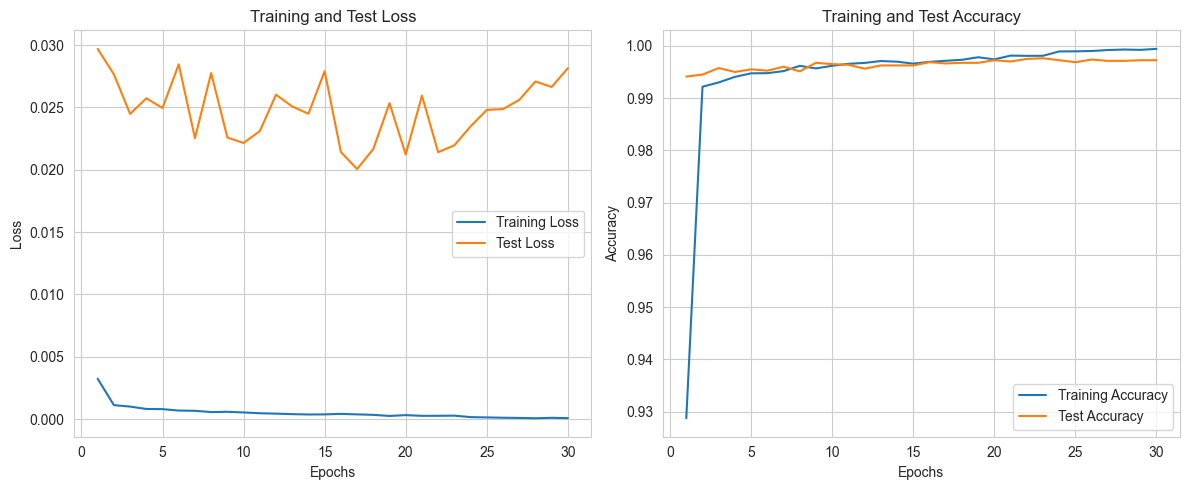

In [57]:
epochs = 30

def training():
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    best_acc = 0.0
    for epoch in range(1, epochs + 1):
        print(f'Epoch # {epoch}/{epochs}')
        
        train_loss, train_acc = train(model, device, train_loader, optimizer, criterion)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        scheduler.step(train_loss)
        
        test_loss, test_acc, _ = test(model, device, test_loader)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
        
        if test_acc > best_acc:
            best_acc = test_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), "best_waldo_model.pt")
    
    # Plot training curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epoch + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epoch + 1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epoch + 1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
training()

### Searching for the best threshold
Let's find the best threshold baset on *f1-score*

100%|██████████| 101/101 [00:33<00:00,  3.00it/s]


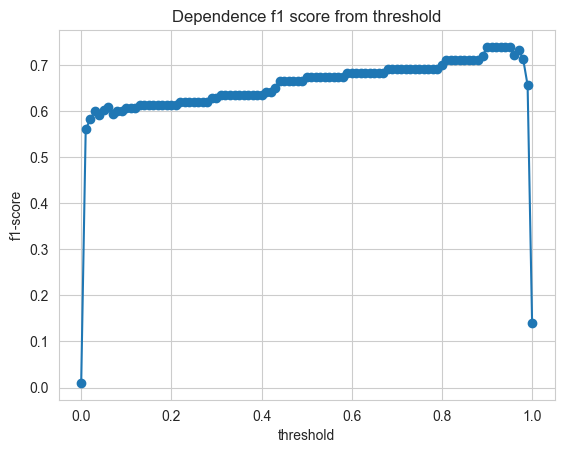

Best threshold: 0.9, Best F1 score: 0.7397260273972602


In [58]:
def find_best_threshold(model, device, test_loader):
    best_threshold = None
    best_f1_score = 0
    # Define a range of thresholds to search within
    threshold_range = [i / 100 for i in range(0, 101)]  # Thresholds from 0.00 to 1.00 with step size of 0.01
    bar = tqdm(threshold_range)
    f1_scores = np.zeros(len(threshold_range))
    for i, threshold in enumerate(bar):
        _, _, f1_scores[i] = test(model, device, test_loader, threshold, enable_output=False)

    best_threshold = threshold_range[np.argmax(f1_scores)]
    best_f1_score = np.max(f1_scores)

    plt.plot(threshold_range, f1_scores, marker='o')
    plt.xlabel('threshold')
    plt.ylabel('f1-score')
    plt.title('Dependence f1 score from threshold')
    plt.grid(True)
    plt.show()

    return best_threshold, best_f1_score


best_threshold, best_f1 = find_best_threshold(model, device, test_loader)
print(f"Best threshold: {best_threshold}, Best F1 score: {best_f1}")

# Feature Importance Analysis
For feature importance analisys we will use [shap](https://shap.readthedocs.io/en/latest/) library. It will determine the most important features by feature permutation.

PermutationExplainer explainer: 8001it [38:31,  3.45it/s]                          


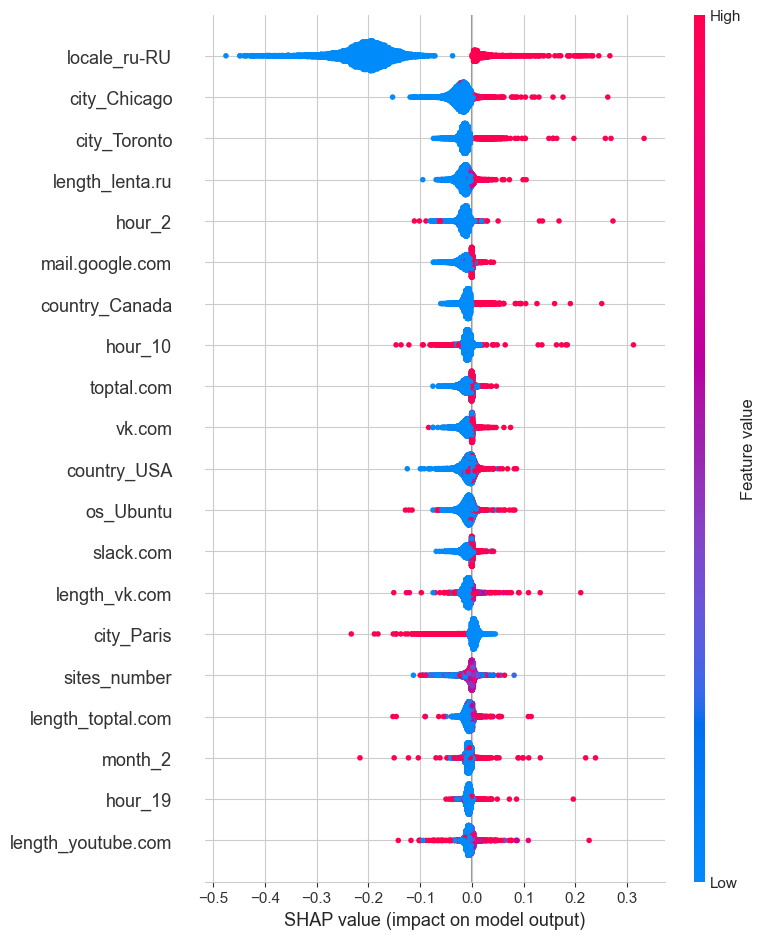

In [37]:
def model_predict(X):
    with torch.no_grad():
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_tensor = torch.tensor(X, device=device).float()
        outputs = model(X_tensor)
        outputs_cpu = outputs.cpu()
        return outputs_cpu.numpy()

explainer = shap.Explainer(model_predict, X_train.values)
shap_values = explainer.shap_values(X_test.values)
shap.summary_plot(shap_values, X_test)

## Conclusion on feature importance Analysis:
- As it was expected from data exploration, locale ru-RU has a great value
- All *'favourite'* sites are in top 20 important features
- Months, hours, browsers and operating systems also turned out to be important

# Evaluation
Get predictions from model in hidden dataset

In [59]:
def get_predictions(model, data, device, threshold=0.9):
    model.eval()
    with torch.no_grad():
        output = model(data)
        pred = (output >= threshold).float()
        return pred

X_hidden_tensor = torch.tensor(X_hidden.values.astype(np.float32)).to(device)
y_hidden = get_predictions(model, X_hidden_tensor, device, threshold=best_threshold)
y_hidden = y_hidden.cpu().numpy()

counter = sum([1 for y in y_hidden if y == 1])
print(f'{counter} Waldo records were detected in hidden dataset')

172 Waldo records were detected in hidden dataset


### Saving predictions to json file

In [60]:
for i in range(len(data_hidden)):
    data_hidden[i]['is_waldo'] = True if y_hidden[i] == 1 else False

In [61]:
with open('task_1_verify.json', 'w') as file:
    json.dump(data_hidden, file)

# Saving the model

In [62]:
model_path = "waldo_best_model.pth"

# Save the model
torch.save(model.state_dict(), model_path)